# 88-Inch Foil Activation Experiment to Measure ETA Neutron Spectrum

The source was 33 MeV deuteron break-up on Ta.

This notebook contains the code necessary to generate STAYSL inputs, a description on how to run STAYSL, and the anaysis and plotting of the resulting outputs.  

## BCF

The STASYL BCF input files are generated from the recoded beam current monitor files stores at:

In [1]:
from Support.Utilities import check_path

bcmPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/ETA_Trimmed.bcm'
check_path(bcmPath)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/ETA_Trimmed.bcm


True

The file used is a modified version of the BCM created file where pre and post calibrations are removed from the file; only the actual irradiation measurements are included.

Support for generating the BCF input files can be found in the [PyScripts Repo](http://github.com/jamesbevins/PyScripts). 

In [2]:
from Unfolding.STAYSL import bcmToBCF

bcfPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/BCF/flux_history.dat'
bcmToBCF(bcmPath, bcfPath)

The total measurement time was 70418.0 seconds with an integrated measurement of 0.759992152.


The BCF file will be placed at the path indicated above.  The BCF code can be executed by double clicking on the BCF executable and typing in the BCF input file name.

## SHIELD

SHIELD requires a fine group cross section file.  For this, the [14468 group shield cross sections](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shld_xsect.out) were used.

NOTE: SHIELD is only valid/necessary for non-threshold reactions.

The course group structure is specified in the [shldengrp.dat](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldengrp.dat) file, but this is not required with STAYSL PNNL v 1.2.0.

The [input file](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.dat) was generated using as measured quantities found in the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx).

SHIELD is ran by double clicking the SHIELD executable located in the same directory as the input files.

## SigPhi Calculator

The [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) was filled in with data from the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx), [BCF output](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/BCF/flux_history.out), and the [experimental analysis data](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/33MeV_ETA_Activation_Analysis.pdf).

** Note: the activities are in units of Bq/g and were adjusted as such from the calculated $A_0$ values **

## STAYSL_PNNL

The STAYSL_PNNL input file was created from the [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) and [MCNP simulation results]().

Default values for covariance data using Gaussian formalism were used.

The [SHIELD library input file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/sshldlib.dat) is an appropriately named copy of the [SHIELD ouput file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.out).

The flux normalization factor (TNORM) for the MCNP flux was calculated using the [Beam Calcs spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/ETA_88_BeamCalcs.xlsx) and experimental data.

To get the flux and flux uncertainty data from the MCNP output into STAYSL format:

In [3]:
from GeneralNuclear.MCNP import read_tally
from Unfolding.STAYSL import stayslFlux

simPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/ETA/Model/33MeVTaETA_Foil.o'
check_path(simPath)

(tallyFrame, tallyTot, uncertTot) = read_tally(simPath, 4, readGroups=True, splitTally=False)

stayslFlux(tallyFrame)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/ETA/Model/33MeVTaETA_Foil.o
The flux:
 2.3974e-10 1.2292e-08 6.7463e-08 2.1397e-07 1.6359e-07 1.6906e-07 1.2008e-07 
 7.8392e-08 7.5427e-08 5.7708e-08 4.5072e-08 2.8285e-08 3.1597e-08 6.9737e-08 
 8.6284e-08 7.5829e-08 1.2383e-07 1.2793e-07 1.7082e-07 1.2087e-07 1.7369e-07 
 1.9553e-07 2.2504e-07 1.4710e-07 1.9295e-07 2.1355e-07 1.3838e-07 1.7414e-07 
 1.7479e-07 2.3253e-07 3.2299e-07 2.2056e-07 3.8014e-07 3.6871e-07 3.4079e-07 
 5.9976e-07 5.5046e-07 9.3286e-07 9.1121e-07 1.4124e-06 1.8586e-06 3.2972e-06 
 3.3787e-06 4.1894e-06 7.6980e-06 1.1571e-05 8.6270e-06 1.7116e-05 2.1455e-05 
 4.2594e-05 3.3772e-05 5.1154e-05 4.3594e-05 5.4343e-05 5.1393e-05 6.0521e-05 
 6.7024e-05 5.2308e-05 7.5198e-05 7.6010e-05 9.0307e-05 9.9916e-05 1.0640e-04 
 1.1529e-04 1.4239e-04 1.6904e-04 1.9964e-04 1.7856e-04 2.4219e-04 2.2648e-04 
 4.0350e-04 3.2201e-04 2.5711e-04 1.9496e-04 1.4212e-04 1.4625e-04 1.0

The STAYSL code is ran by double clicking the executable or running from the command line. 

## Output Analysis

Read the data from the output file using pandas. Convert relative std to absolute.

In [4]:
import pandas as pd

path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/stayslin.out'
df = pd.read_table(path, engine='python', sep='\s+', skiprows=99, skipfooter=649, header=None,
                   names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                          'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

df.apply(pd.to_numeric)
df['adjStd'] = df['adjStd'] * df['adjFlux'] / 100
df['unadjStd'] = df['unadjStd'] * df['unadjFlux'] / 100

df

,lowE,adjFlux,unadjFlux,fluxRatio,adjStd,unadjStd,uncertRatio,integralFlux,intFluxUncert
1,1.000000e-10,1.110600e+08,1.197300e+07,9.276,1.087833e+08,1.197300e+07,0.980,255830.00000,0.46
2,1.000000e-09,1.603900e+08,6.138900e+07,2.613,2.771539e+07,1.089041e+07,0.974,255830.00000,0.46
3,1.000000e-08,4.541000e+08,2.332600e+08,1.947,4.209507e+07,2.232298e+07,0.969,255830.00000,0.46
4,2.300000e-08,6.194300e+08,3.562100e+08,1.739,4.125404e+07,2.464973e+07,0.962,255820.00000,0.46
5,5.000000e-08,5.099900e+08,2.828100e+08,1.803,3.386334e+07,1.965530e+07,0.956,255800.00000,0.46
6,7.600000e-08,4.038000e+08,1.948400e+08,2.072,3.299046e+07,1.673676e+07,0.950,255790.00000,0.46
7,1.150000e-07,2.707100e+08,9.813400e+07,2.759,3.359511e+07,1.290462e+07,0.944,255780.00000,0.46
8,1.700000e-07,1.084800e+08,4.145400e+07,2.617,1.170499e+07,4.771355e+06,0.938,255760.00000,0.46
9,2.550000e-07,8.927100e+07,2.712200e+07,3.291,1.293537e+07,4.217471e+06,0.932,255750.00000,0.46
10,3.800000e-07,4.667100e+07,1.525800e+07,3.059,5.843209e+06,2.061356e+06,0.927,255740.00000,0.46


Convert to Histograms and plot the adjusted and unadjusted flux.

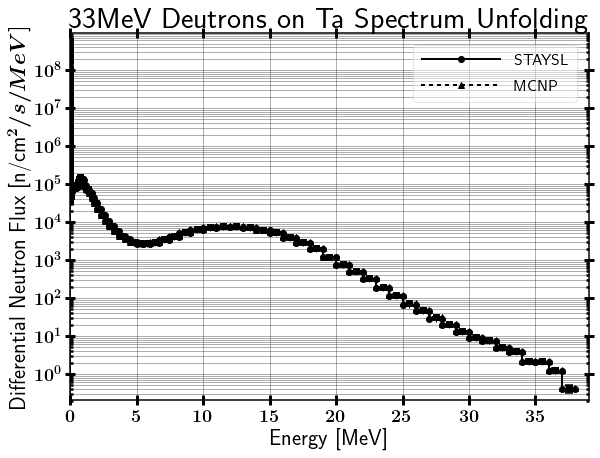

In [5]:
from DataAnalysis.Histograms import Histogram
import matplotlib
%matplotlib inline

outpath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/'

adjDiffHisto = Histogram()
adjDiffHisto.build_histo(df['lowE'].tolist(), df['adjFlux'].tolist(), uncert=df['adjStd'].tolist(),
                     edgeLoc='low', name='STAYSL')

unadjDiffHisto = Histogram()
unadjDiffHisto.build_histo(df['lowE'].tolist(), df['unadjFlux'].tolist(), uncert=df['unadjStd'].tolist(),
                     edgeLoc='low', name='MCNP')

adjDiffHisto.plot(unadjDiffHisto, xMin=1E-6, logX=False, logY=True,
                  title='33MeV Deutrons on Ta Spectrum Unfolding',
                  xLabel='Energy [MeV]', yLabel='Differential Neutron Flux [n/cm^2/s/MeV]',
                  savePath=outpath+'33MeVTa_Staysl-Unfold_Differential')

Convert from differential spectrum and plot.

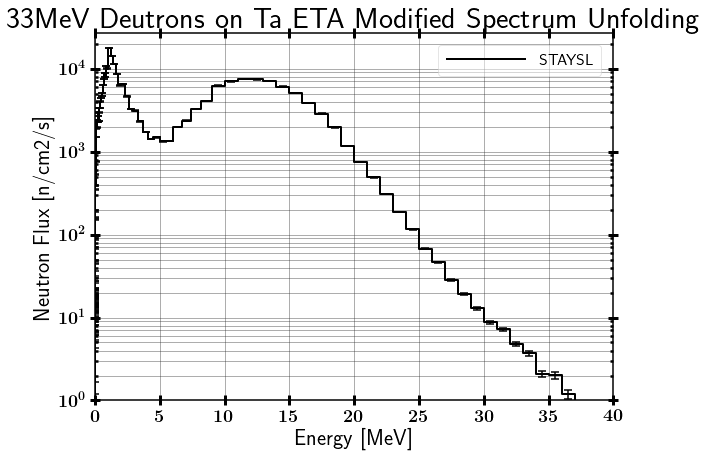

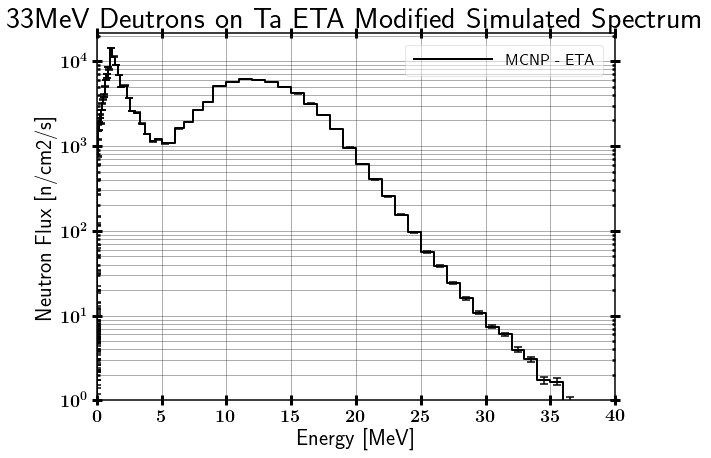

C:\Users\James\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


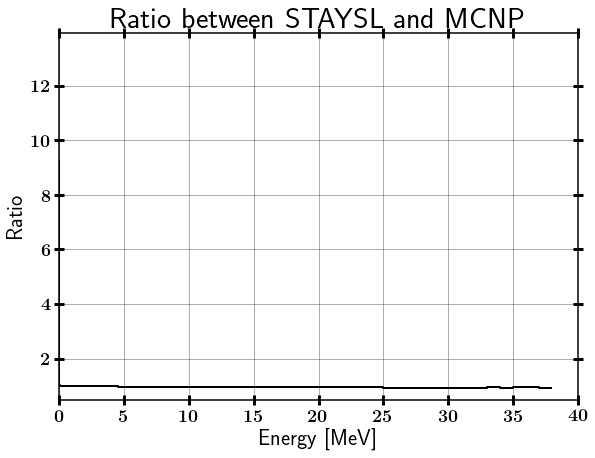

In [6]:
from DataAnalysis.DataManipulation import bin_integration

adjHisto = Histogram()
adjHisto.build_histo(df['lowE'].tolist(),
                     bin_integration(df['lowE'].tolist(), df['adjFlux'].tolist(), 'low'),
                     uncert=bin_integration(df['lowE'].tolist(), df['adjStd'].tolist(), 'low'),
                     edgeLoc='low', name='STAYSL')

adjHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold')

mcnpHisto = Histogram()
normFactor = 3.52E7
tallyFrame['normTally'] = tallyFrame['tally'] * normFactor
tallyFrame['normUncertainty'] = tallyFrame['uncertainty'] * tallyFrame['normTally']
mcnpHisto.build_histo(tallyFrame['bin'].tolist(), tallyFrame['normTally'].tolist(), 
                       uncert=tallyFrame['normUncertainty'].tolist(), edgeLoc='up', name='MCNP - ETA')
mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
               title='33MeV Deutrons on Ta ETA Modified Simulated Spectrum',
               xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
               savePath=outpath+'33MeVTa_MCNP')

ratioHisto = Histogram()
ratioHisto.build_histo(df['lowE'].tolist(), df['fluxRatio'].tolist(), edgeLoc='low')
ratioHisto.plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP',
              xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio')

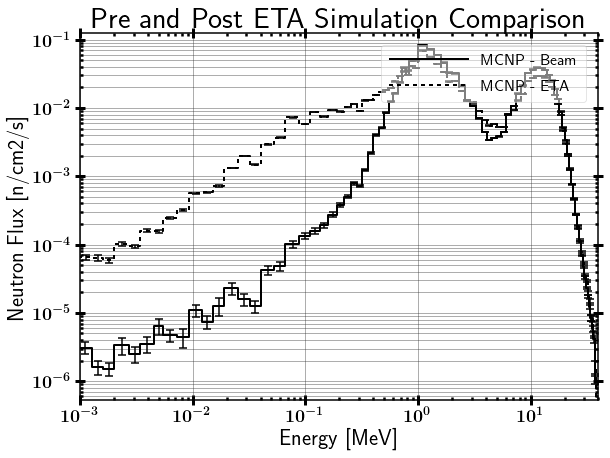

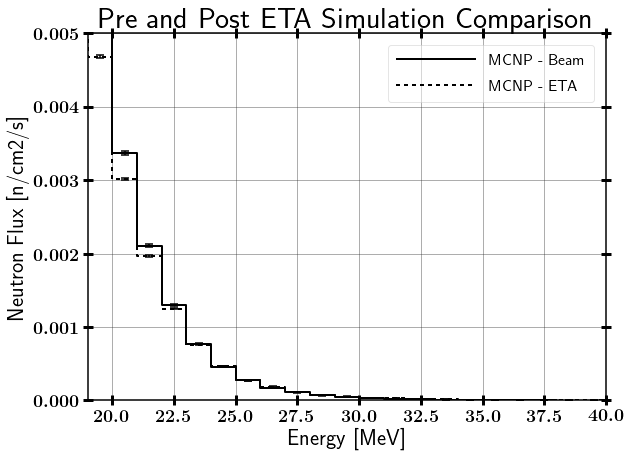

In [7]:
import numpy as np

path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration3/stayslin.out'
beamDF = pd.read_table(path, engine='python', sep='\s+', skiprows=99, skipfooter=649, header=None,
                       names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                       'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

beamDF.apply(pd.to_numeric)
beamDF['adjFlux'] = bin_integration(beamDF['lowE'].tolist(), beamDF['adjFlux'].tolist(), 'low')
beamDF['adjStd'] = beamDF['adjStd'] / 100
beamDF['normAdjFlux'] = beamDF['adjFlux'] / sum(beamDF['adjFlux'])
beamDF['normAdjStd'] = beamDF['adjStd'] * beamDF['normAdjFlux']

mcnpBeamNormHisto = Histogram()
mcnpBeamNormHisto.build_histo(beamDF['lowE'].tolist(), beamDF['normAdjFlux'].tolist(), 
                              uncert=beamDF['normAdjStd'].tolist(), edgeLoc='low',
                              name='MCNP - Beam')

mcnpETANormHisto = Histogram()
mcnpETANormHisto.build_histo(tallyFrame['bin'].tolist(), 
                             (tallyFrame['tally']* (1.0 / sum(tallyFrame['tally']))).tolist(), 
                             uncert=(tallyFrame['uncertainty']*tallyFrame['tally']*(1.0/sum(tallyFrame['tally']))).tolist(),
                             edgeLoc='up', name='MCNP - ETA')

mcnpBeamNormHisto.plot(mcnpETANormHisto, xMin=1E-3, xMax=40, logX=True, logY=True,
                      includeMarkers=False, title='Pre and Post ETA Simulation Comparison',
                      xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
                      savePath=outpath+'33MeVTa_MCNP_Comp')

mcnpBeamNormHisto.plot(mcnpETANormHisto, xMin=19, xMax=40, yMin=1e-8, yMax=0.005, logX=False, logY=False,
                      includeMarkers=False, title='Pre and Post ETA Simulation Comparison',
                      xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
                      savePath=outpath+'33MeVTa_MCNP_Comp')

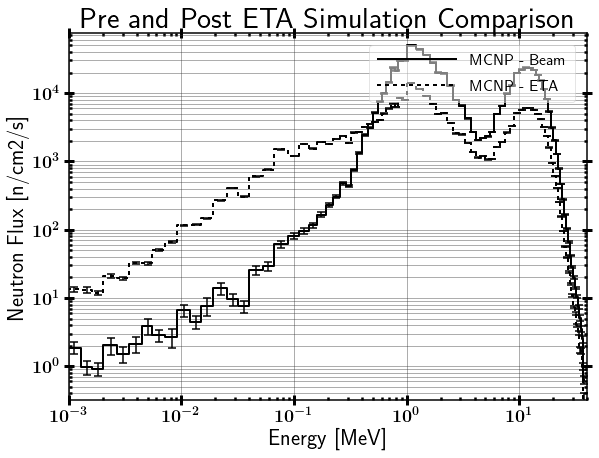

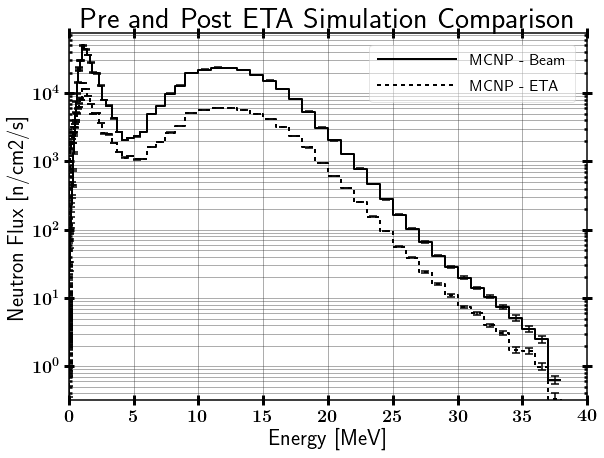

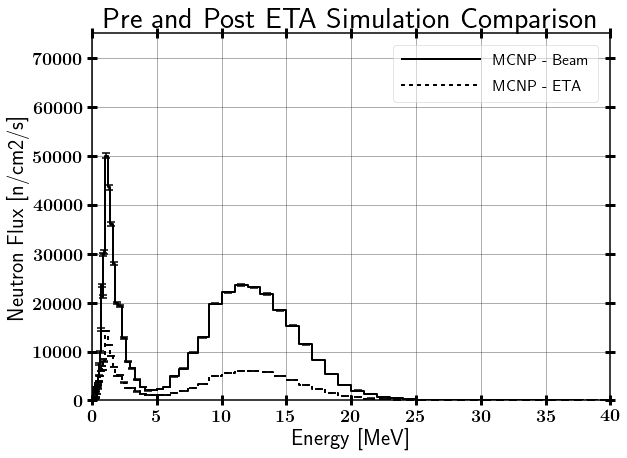

In [8]:
mcnpBeamHisto = Histogram()
mcnpBeamHisto.build_histo(beamDF['lowE'].tolist(), beamDF['adjFlux'].tolist(), 
                          uncert=(beamDF['adjStd']*beamDF['adjFlux']).tolist(), edgeLoc='low',
                          name='MCNP - Beam')

mcnpBeamHisto.plot(mcnpHisto, xMin=1E-3, xMax=40, logX=True, logY=True,
                   includeMarkers=False, title='Pre and Post ETA Simulation Comparison',
                   xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
                   savePath=outpath+'33MeVTa_MCNP_Comp')

mcnpBeamHisto.plot(mcnpHisto, xMin=1E-3, xMax=40, logX=False, logY=True,
                   includeMarkers=False, title='Pre and Post ETA Simulation Comparison',
                   xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
                   savePath=outpath+'33MeVTa_MCNP_Comp')

mcnpBeamHisto.plot(mcnpHisto, xMin=0, xMax=40, logX=False, logY=False,
                   includeMarkers=False, title='Pre and Post ETA Simulation Comparison',
                   xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
                   savePath=outpath+'33MeVTa_MCNP_Comp')

### Iterative Solution #1:

  - No modifications are made to the MCNP results for the guess spectrum
  - It does update the uncertainty throughout the convergence process. 

In [13]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration1/'

# Build Data Structure Lists
iterSoln = []
iterAdjHisto = []
iterRatioHisto = []

iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration1/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration1/stayslin.out
Chi^2 = 534.52547, Std Norm = 1.25247827526
Chi^2 = 264.58452
Chi^2 = 152.44757
Chi^2 = 125.40891
Chi^2 = 103.15644
Chi^2 = 83.75012
Chi^2 = 67.79942
Chi^2 = 55.31656
Chi^2 = 45.86603
Chi^2 = 38.88355
Chi^2 = 33.81018
Chi^2 = 30.16078
Chi^2 = 27.53773
Chi^2 = 25.64323
Chi^2 = 24.26268
Chi^2 = 23.24617
Chi^2 = 22.49083
Chi^2 = 21.92126
Chi^2 = 21.4866
Chi^2 = 21.15099
Chi^2 = 20.88717
Chi^2 = 20.67716
Chi^2 = 20.50704
Chi^2 = 20.36777
Chi^2 = 20.25177
Chi^2 = 20.15311
Chi^2 = 20.06842
Chi^2 = 19.99429
Chi^2 = 19.92836
Chi^2 = 19.86877
Chi^2 = 19.81432
Chi^2 = 19

Chi^2 = 11.57816
Chi^2 = 11.56649
Chi^2 = 11.55494
Chi^2 = 11.54322
Chi^2 = 11.53164
Chi^2 = 11.52001
Chi^2 = 11.50843
Chi^2 = 11.49685
Chi^2 = 11.48542
Chi^2 = 11.4739
Chi^2 = 11.46247
Chi^2 = 11.4511
Chi^2 = 11.43972
Chi^2 = 11.42838
Chi^2 = 11.41704
Chi^2 = 11.40571
Chi^2 = 11.39438
Chi^2 = 11.38306
Chi^2 = 11.37175
Chi^2 = 11.36042
Chi^2 = 11.34912
Chi^2 = 11.33794
Chi^2 = 11.32658
Chi^2 = 11.3154
Chi^2 = 11.30424
Chi^2 = 11.29296
Chi^2 = 11.28168
Chi^2 = 11.27054
Chi^2 = 11.25947
Chi^2 = 11.24822
Chi^2 = 11.2373
Chi^2 = 11.22615
Chi^2 = 11.21508
Chi^2 = 11.20411
Chi^2 = 11.19306
Chi^2 = 11.18199
Chi^2 = 11.17101
Chi^2 = 11.1601
Chi^2 = 11.14921
Chi^2 = 11.1383
Chi^2 = 11.12745
Chi^2 = 11.11661
Chi^2 = 11.10574
Chi^2 = 11.0948
Chi^2 = 11.08387
Chi^2 = 11.07294
Chi^2 = 11.06221
Chi^2 = 11.05146
Chi^2 = 11.04074
Chi^2 = 11.03029
Chi^2 = 11.01954
Chi^2 = 11.00898
Chi^2 = 10.9984
Chi^2 = 10.9878
Chi^2 = 10.97712
Chi^2 = 10.96683
Chi^2 = 10.95625
Chi^2 = 10.9456
Chi^2 = 10.93522
Chi^2 =

Beam TotalFluence = 2.712692e+05
ETA TotalFluence = 4.113830e+05


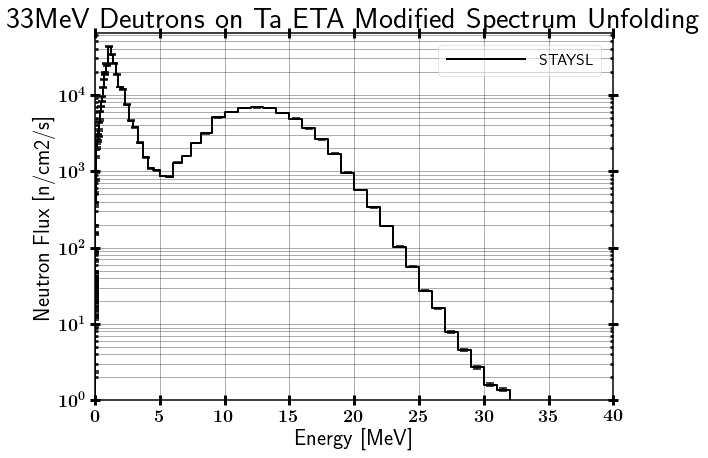

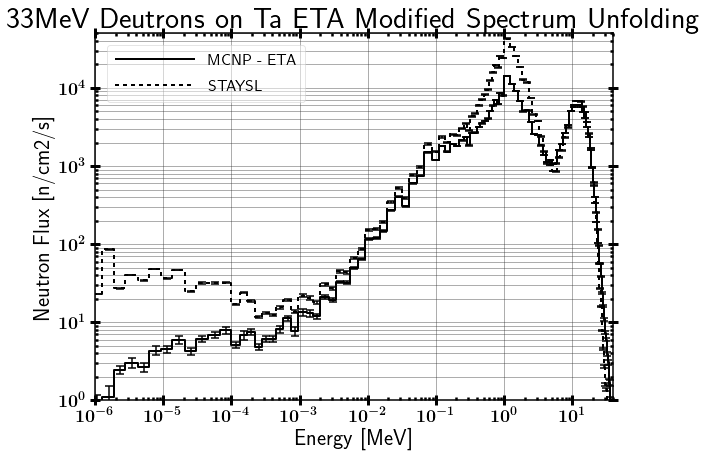

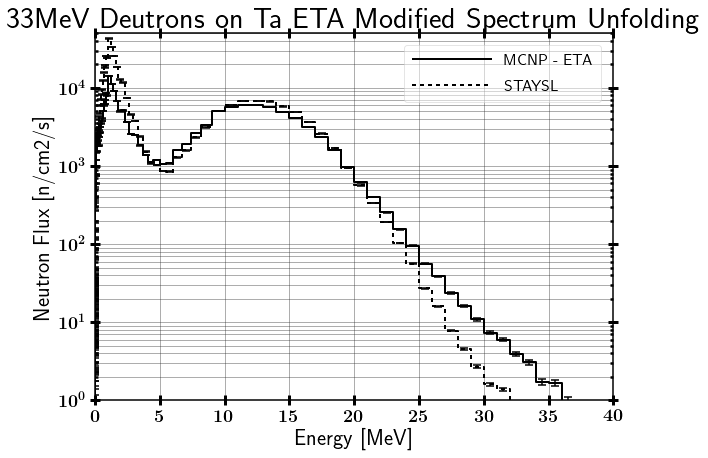

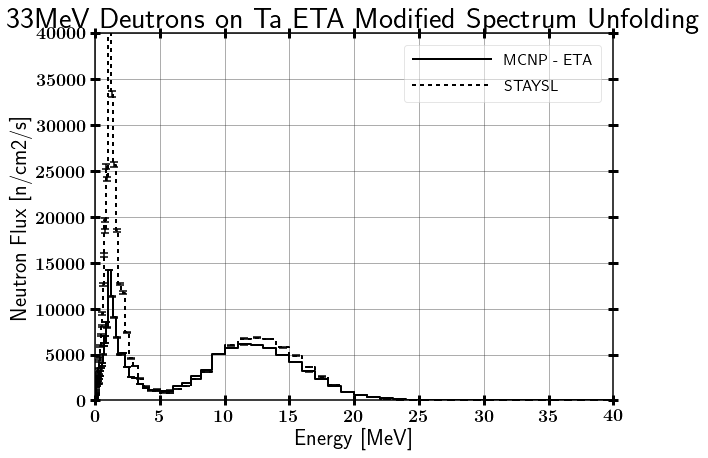

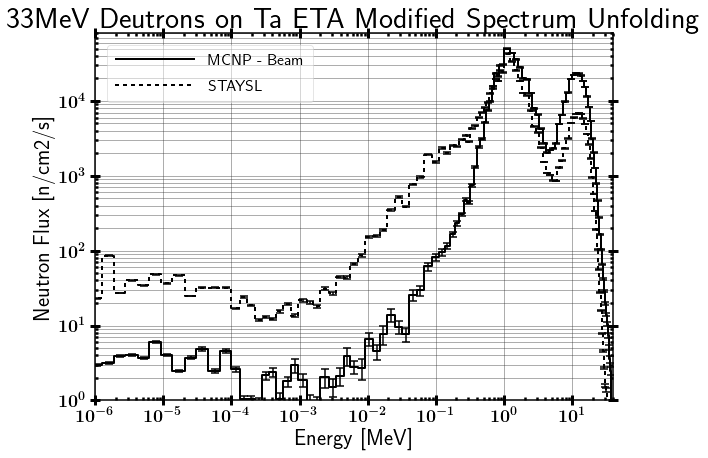

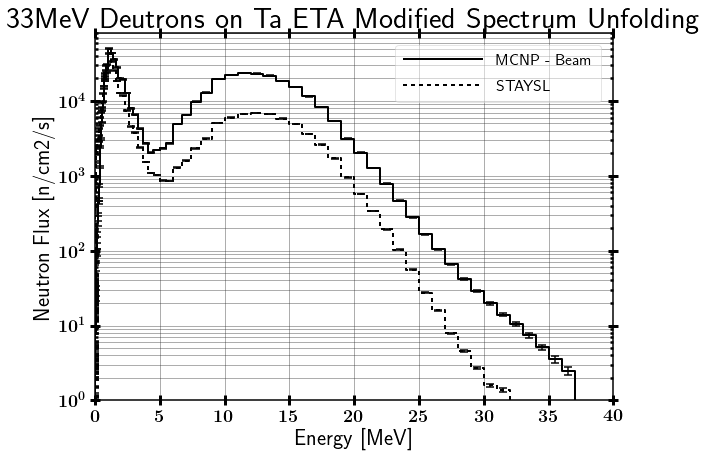

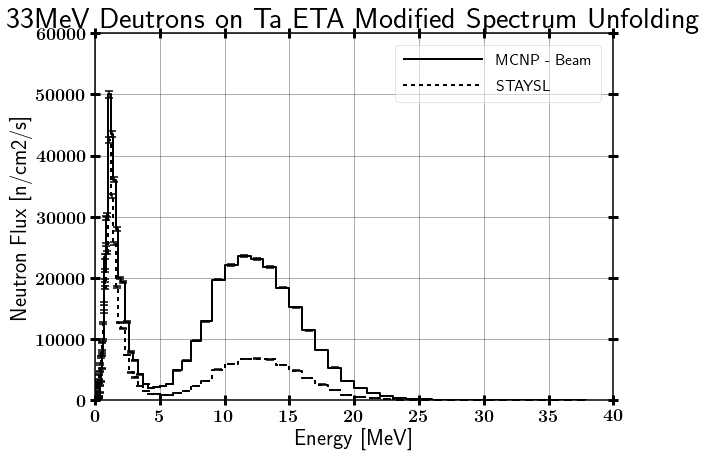

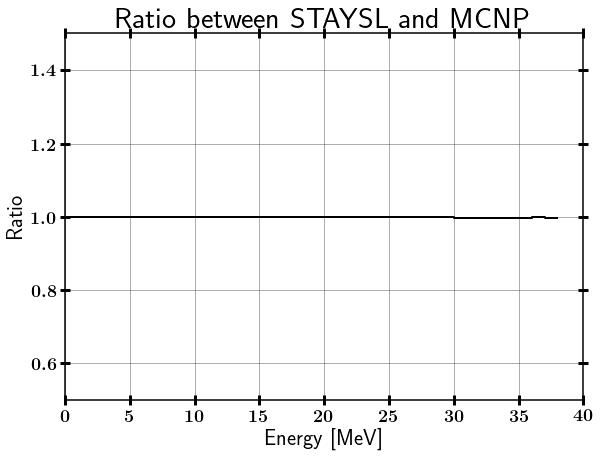

In [14]:
iter = 0

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

print "Beam TotalFluence = {:2e}".format(sum(bin_integration(beamDF['lowE'].tolist(), beamDF['adjFlux'].tolist(), 'low')))
print "ETA TotalFluence = {:2e}".format(sum(iterSoln[iter]._df['adjFlux']))

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=5E4, logX=True, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]', legendLoc=2)
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=5E4, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=4E4, logX=False, logY=False, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

mcnpBeamHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=8E4, logX=True, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]', legendLoc=2)
mcnpBeamHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=8E4, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')
mcnpBeamHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=6E4, logX=False, logY=False, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #2:

  - A uniform spectrum of 5E-7 with 100% uncertainty is used.
  - It does update the uncertainty throughout the convergence process. 

In [11]:
stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration2/'

iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration2/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration2/stayslin.out
Chi^2 = 2859.41425, Std Norm = 9.05362293118
Chi^2 = 11.07967
Chi^2 = 8.71617
Chi^2 = 7.49779
Chi^2 = 7.23582
Chi^2 = 7.07765
Chi^2 = 6.96757
Chi^2 = 6.88598
Chi^2 = 6.82154
Chi^2 = 6.7677
Chi^2 = 6.7218
Chi^2 = 6.68183
Chi^2 = 6.64588
Chi^2 = 6.61283
Chi^2 = 6.58252
Chi^2 = 6.55486
Chi^2 = 6.52937
Chi^2 = 6.50503
Chi^2 = 6.48296
Chi^2 = 6.46196
Chi^2 = 6.44165
Chi^2 = 6.42267
Chi^2 = 6.40463
Chi^2 = 6.38757
Chi^2 = 6.3713
Chi^2 = 6.35551
Chi^2 = 6.34008
Chi^2 = 6.32548
Chi^2 = 6.31195
Chi^2 = 6.2986
Chi^2 = 6.28596
Chi^2 = 6.27354
Chi^2 = 6.26137
Chi^2 = 6.249

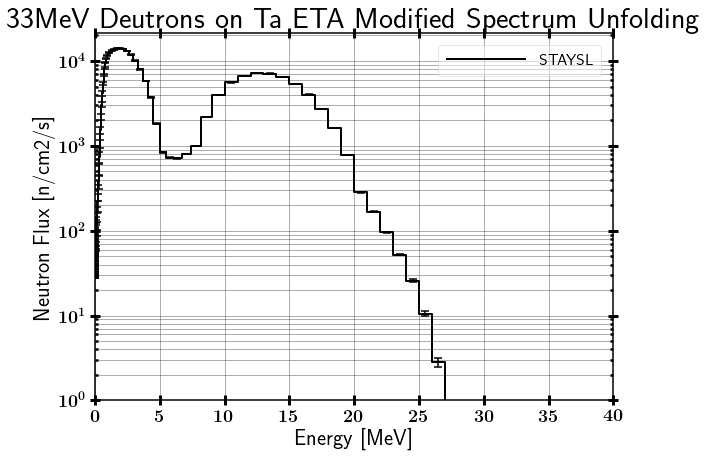

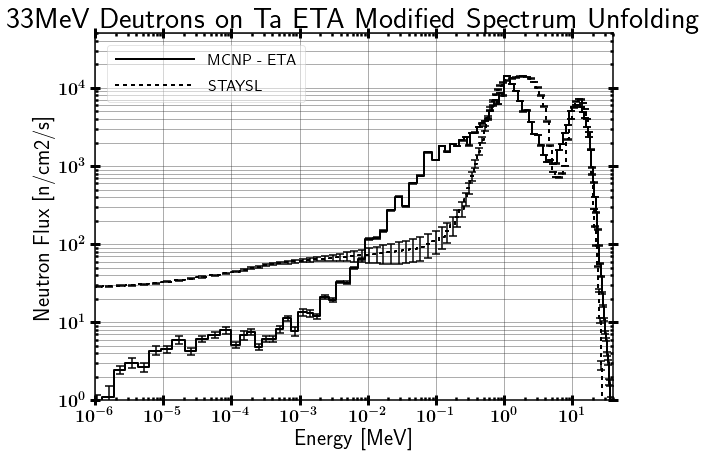

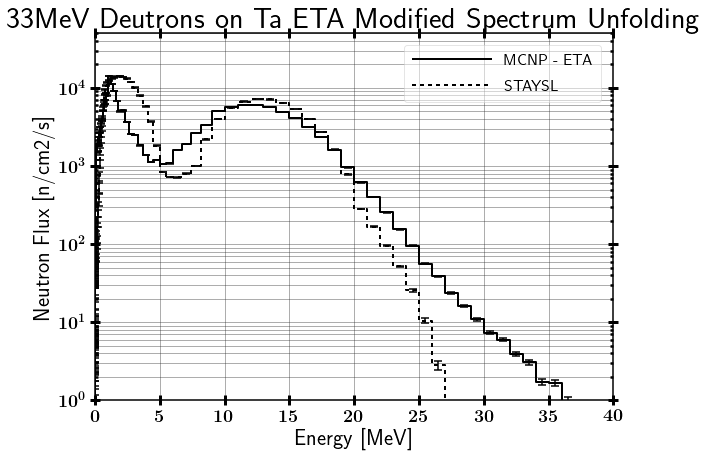

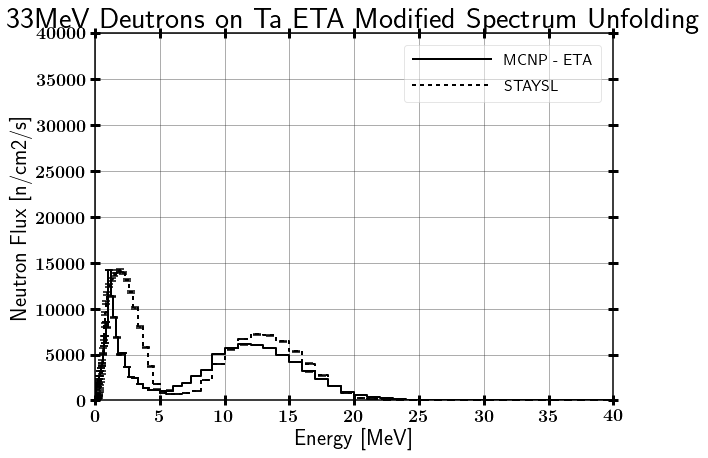

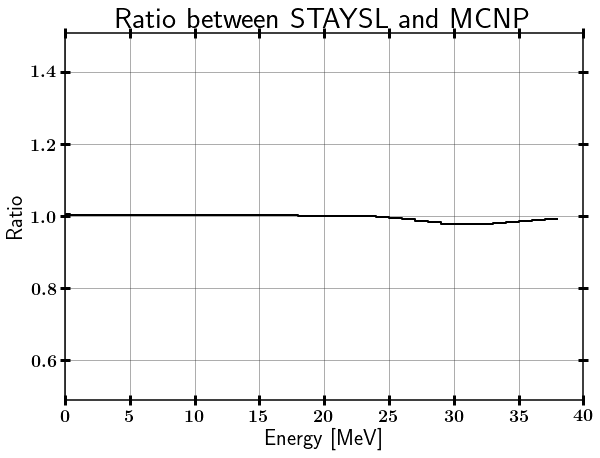

In [12]:
iter = 1

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=5E4, logX=True, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]', legendLoc=2)
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=5E4, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=4E4, logX=False, logY=False, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))